In [9]:
# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns

# Load the downloaded dataset into a pandas DataFrame
# Update the file path to the correct location of the dataset
import os

path = "../stephanie/acaht_prod_fourn_stock.csv"  # Assign the path to the variable 'path'
if os.path.exists(path):
	data = pd.read_csv(path)   # Load the dataset if the file exists
	print("Dataset loaded successfully.")
else:
	print(f"File not found at path: {path}")

Dataset loaded successfully.


In [10]:
data.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,marque,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,Atelier Minéral,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,Reflet d'or,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,Ãveil Ãlégant,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,Reflet d'or,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille
4,PO000005,2a024-06-07,P00196,50,S025,256.05,13,12802.5,6,2024,...,Luxe eclat,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris


In [11]:
data.describe()

,quantité,prix_unitaire,délai_livraison_jours,montant_total,mois,année,jour_semaine,prix,stock_minimum,fiabilité,délai_moyen_jours,niveau_stock
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,99.512500,155.187121,7.955900,15530.706135,6.537200,2024.0,2.978200,258.293713,53.283000,0.697760,7.05340,147.771300
std,98.580534,83.661601,3.754273,19313.230160,3.455316,0.0,2.011549,141.211258,25.376137,0.143535,2.19076,88.354962
min,10.000000,10.030000,2.000000,100.300000,1.000000,2024.0,0.000000,22.220000,10.000000,0.500000,3.00000,0.000000
25%,25.000000,83.087500,5.000000,3508.937500,4.000000,2024.0,1.000000,130.720000,31.000000,0.540000,6.00000,72.000000
50%,75.000000,155.365000,8.000000,9099.500000,7.000000,2024.0,3.000000,258.450000,54.000000,0.650000,7.00000,145.000000
75%,100.000000,227.740000,11.000000,19748.062500,10.000000,2024.0,5.000000,376.880000,74.000000,0.740000,8.00000,226.000000
max,500.000000,299.980000,14.000000,148310.000000,12.000000,2024.0,6.000000,499.720000,99.000000,1.000000,14.00000,299.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_achat               10000 non-null  object 
 1   date_achat             10000 non-null  object 
 2   id_produit             10000 non-null  object 
 3   quantité               10000 non-null  int64  
 4   id_fournisseur         10000 non-null  object 
 5   prix_unitaire          10000 non-null  float64
 6   délai_livraison_jours  10000 non-null  int64  
 7   montant_total          10000 non-null  float64
 8   mois                   10000 non-null  int64  
 9   année                  10000 non-null  int64  
 10  jour_semaine           10000 non-null  int64  
 11  catégorie              10000 non-null  object 
 12  marque                 10000 non-null  object 
 13  prix                   10000 non-null  float64
 14  stock_minimum          10000 non-null  int64  
 15  nom

In [17]:
data.isnull().sum()

id_achat                 0
date_achat               0
id_produit               0
quantité                 0
id_fournisseur           0
prix_unitaire            0
délai_livraison_jours    0
montant_total            0
mois                     0
année                    0
jour_semaine             0
catégorie                0
marque                   0
prix                     0
stock_minimum            0
nom_fournisseur          0
ville                    0
pays                     0
fiabilité                0
délai_moyen_jours        0
niveau_stock             0
entrepot                 0
dtype: int64

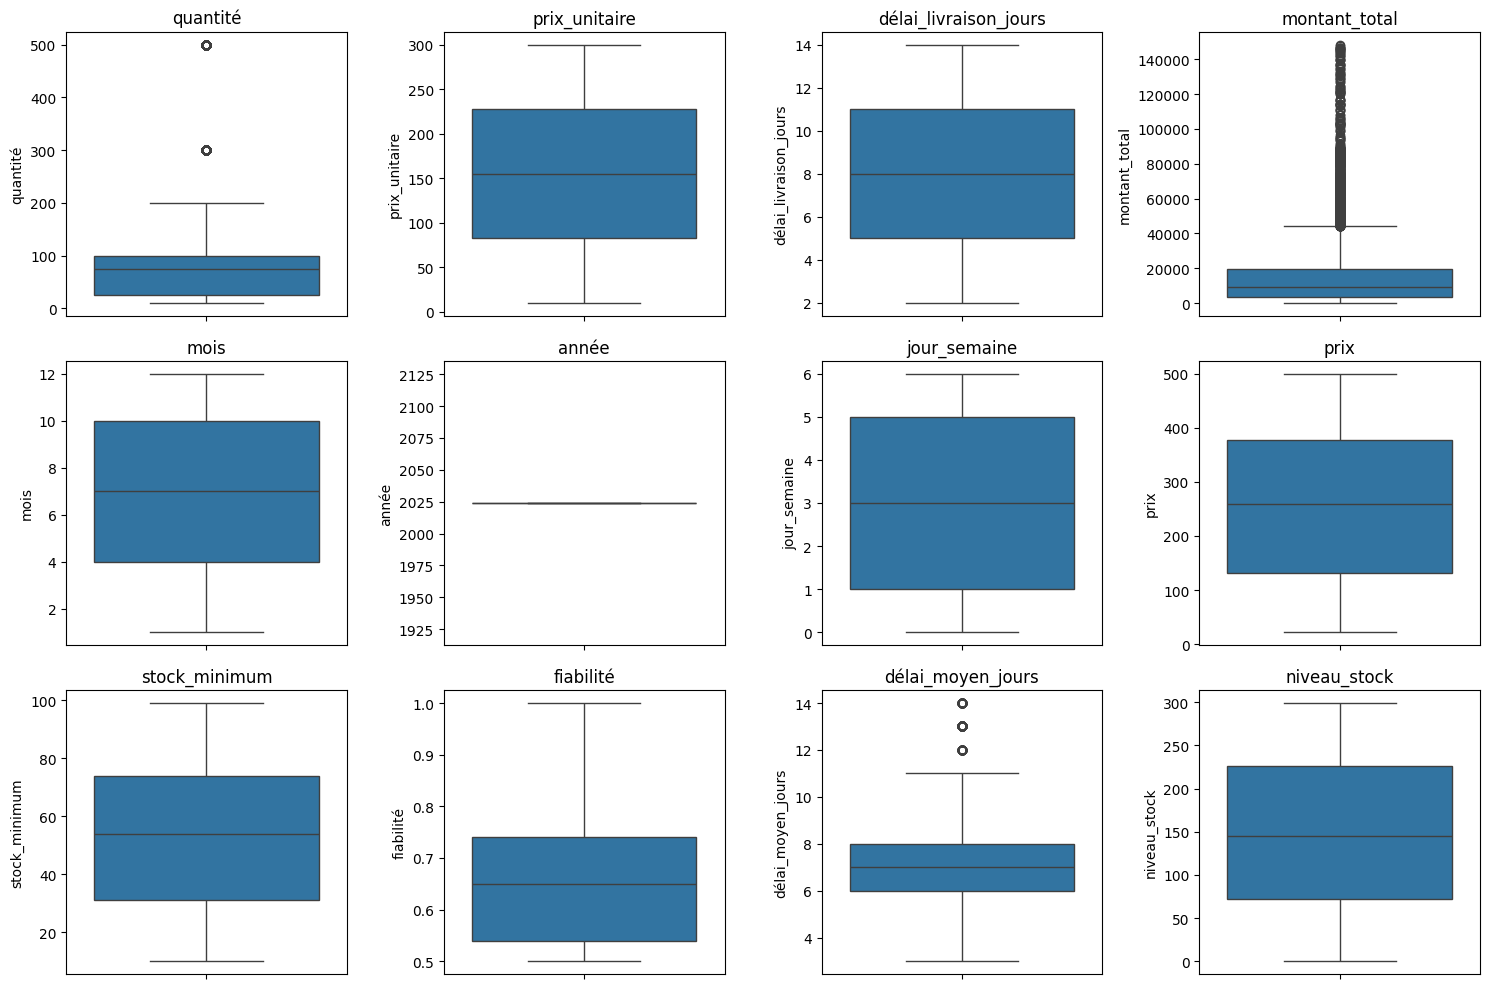

In [13]:
# Créer des box plots pour chaque variable numérique
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Ajustez les dimensions du subplot en fonction du nombre de colonnes
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

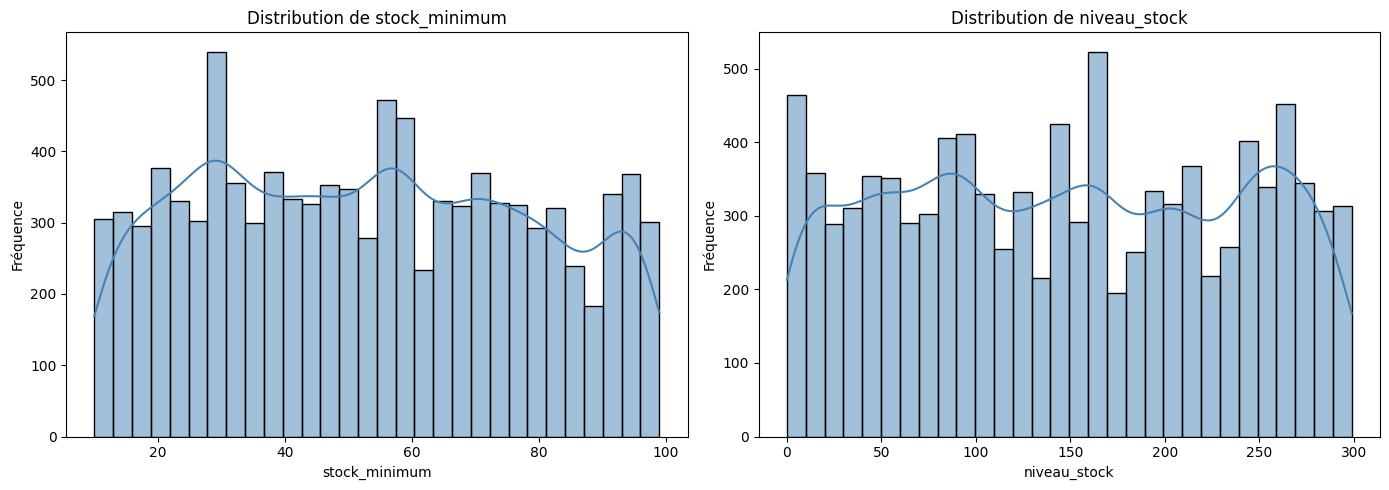

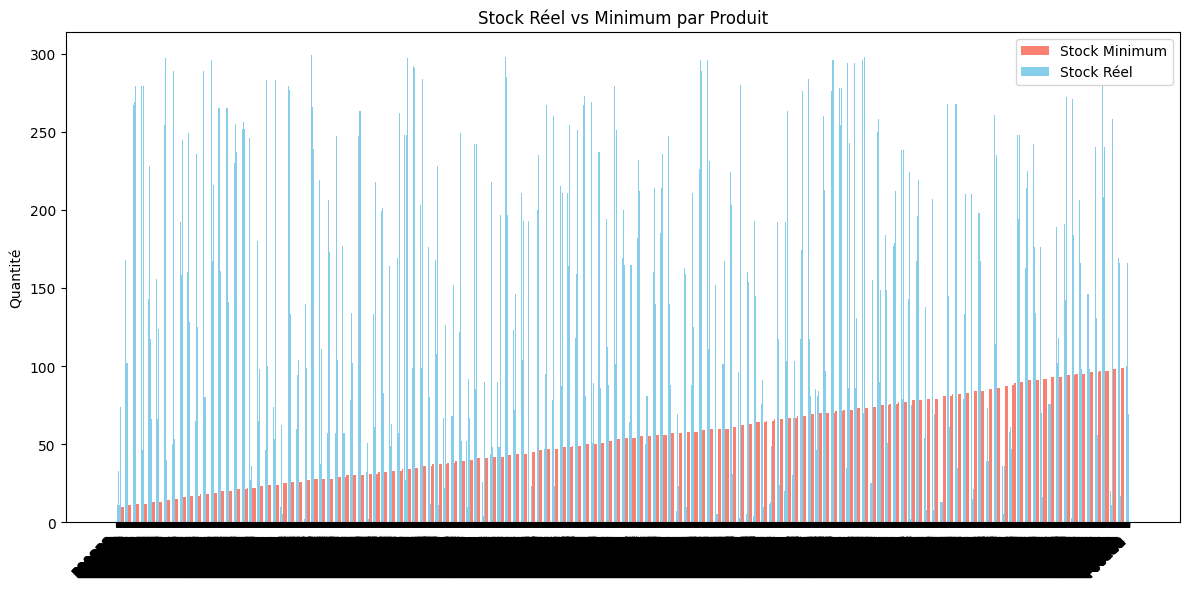

In [30]:
# 🎯 1. Distribution des stocks (minimum & réel)
plt.figure(figsize=(14, 5))

for i, column in enumerate(['stock_minimum', 'niveau_stock'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[column], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

# 📊 2. Bar Chart : Stock réel vs Stock minimum par produit
plt.figure(figsize=(12, 6))
data_sorted = data.sort_values('stock_minimum')
bar_width = 0.4
x = range(len(data_sorted))

plt.bar(x, data_sorted['stock_minimum'], width=bar_width, label='Stock Minimum', color='salmon')
plt.bar([p + bar_width for p in x], data_sorted['niveau_stock'], width=bar_width, label='Stock Réel', color='skyblue')

plt.xticks([p + bar_width / 2 for p in x], data_sorted['id_produit'], rotation=45, ha='right')
plt.title('Stock Réel vs Minimum par Produit')
plt.ylabel('Quantité')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_14420/501415501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ville_montant, x='ville', y='montant_total', palette='Blues_d')


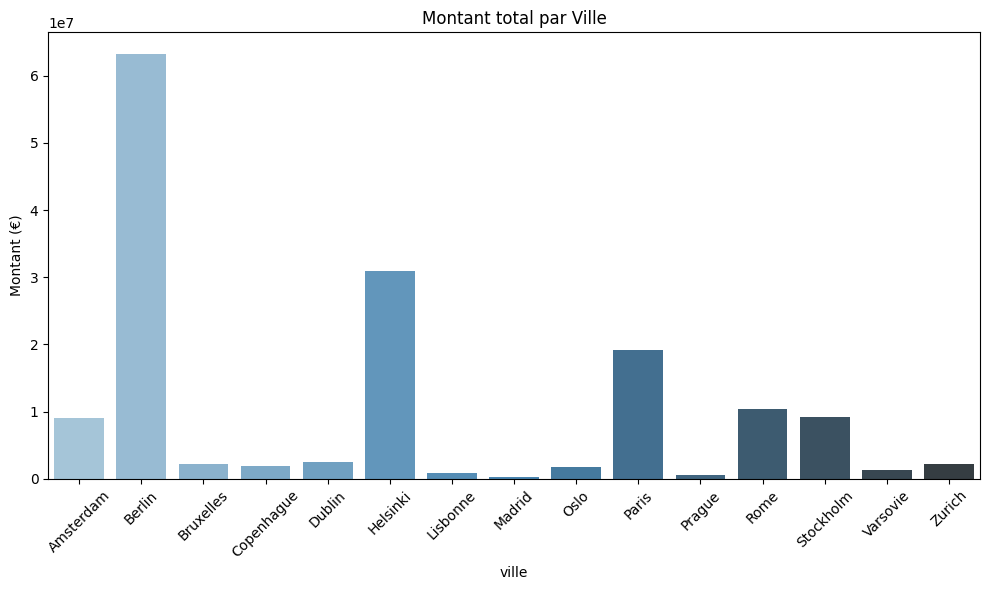

In [31]:
# 🏙️ 4. Bar Chart : Ville vs Montant total
plt.figure(figsize=(10, 6))
ville_montant = data.groupby('ville')['montant_total'].sum().reset_index()
sns.barplot(data=ville_montant, x='ville', y='montant_total', palette='Blues_d')
plt.title('Montant total par Ville')
plt.xticks(rotation=45)
plt.ylabel('Montant (€)')
plt.tight_layout()
plt.show()


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_14420/4150229535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='nom_fournisseur', y='fiabilité', palette='coolwarm')


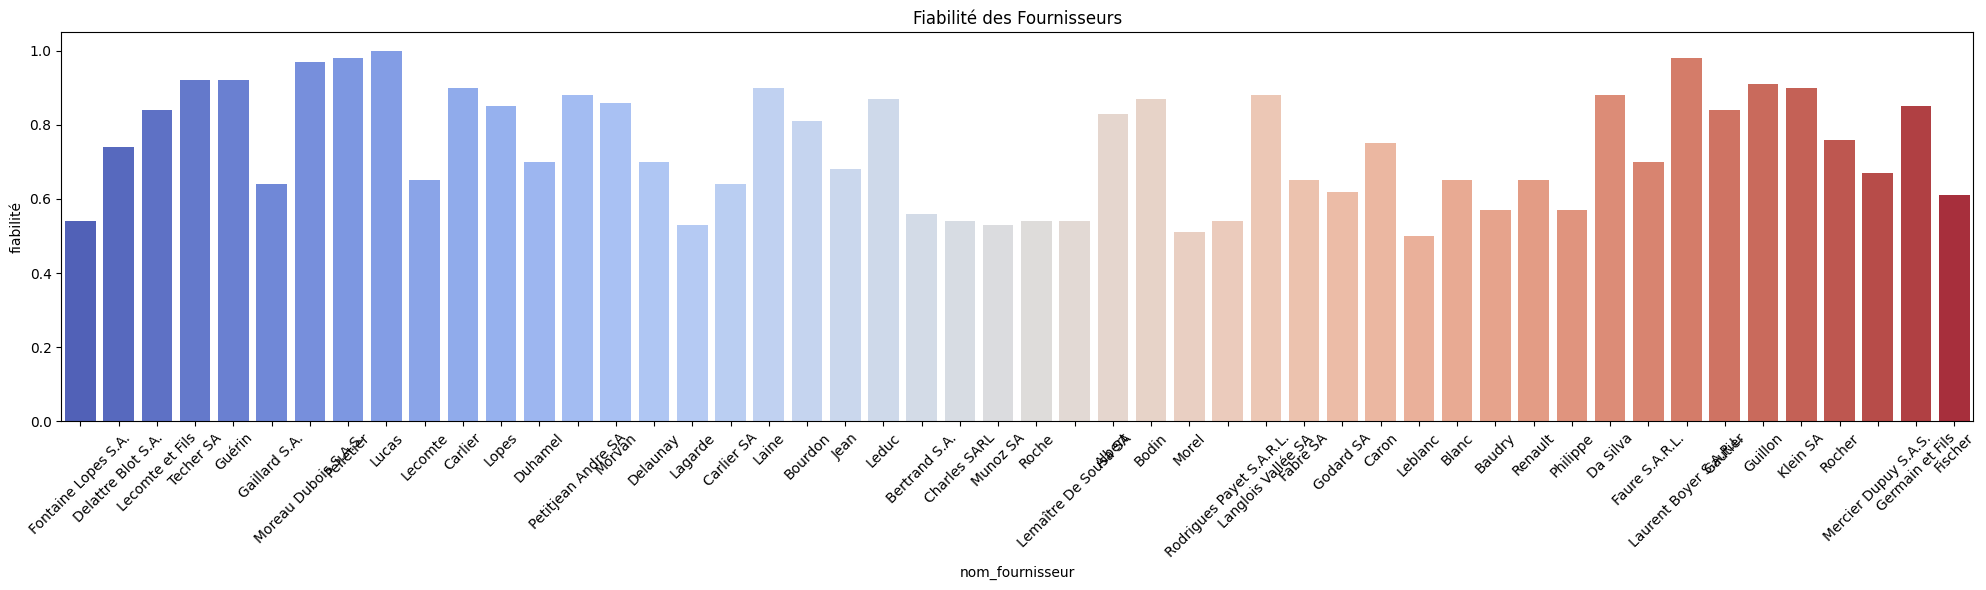

In [34]:
# 🧩 6. Fiabilité vs Fournisseur (Scatter ou Barplot selon type de variable)
plt.figure(figsize=(20, 6))
# Si 'fiabilité' est numérique :
sns.barplot(data=data, x='nom_fournisseur', y='fiabilité', palette='coolwarm')
# Sinon si c’est une catégorie : utiliser `countplot` ou mapper en valeur numérique
plt.title('Fiabilité des Fournisseurs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_14420/620272134.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantite_par_fournisseur, x='nom_fournisseur', y='quantité', palette='Blues_d')


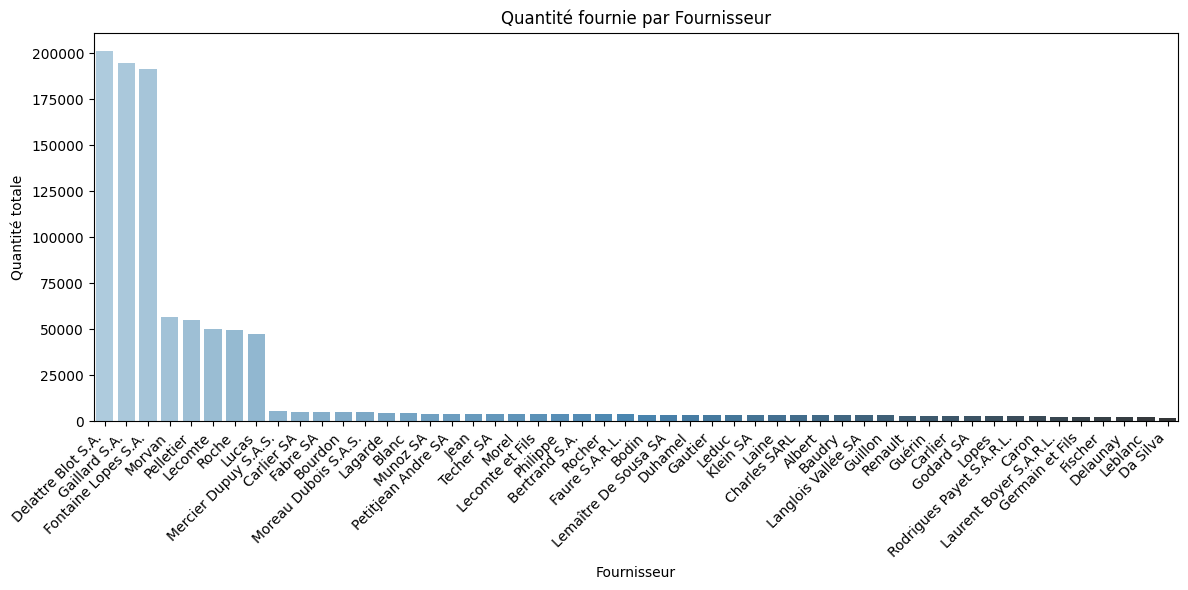

In [40]:
# Regrouper les quantités par fournisseur
quantite_par_fournisseur = data.groupby('nom_fournisseur')['quantité'].sum().reset_index()

# Trier du plus grand au plus petit
quantite_par_fournisseur = quantite_par_fournisseur.sort_values(by='quantité', ascending=False)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=quantite_par_fournisseur, x='nom_fournisseur', y='quantité', palette='Blues_d')
plt.title('Quantité fournie par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Quantité totale')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Column 'date_livraison' not found. Creating it with default NaT values.


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_14420/2175792726.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_valid, x='jour_semaine', y='délai_livraison_jours', marker='o', ci=None)


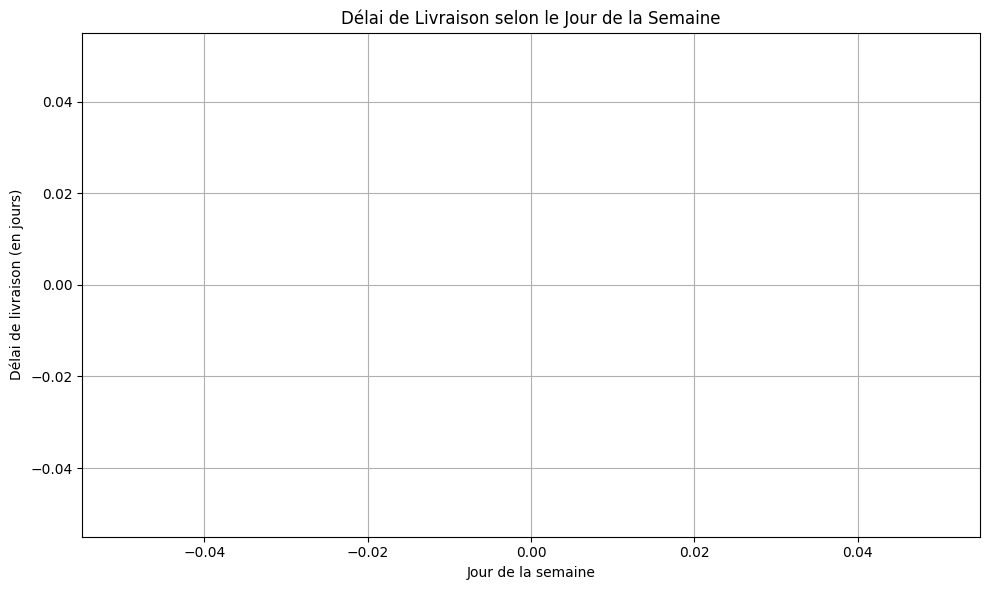

In [46]:


# ✅ 1. Assure-toi que les colonnes existent et ont le bon format
# ✅ 1. Assure-toi que les colonnes existent et ont le bon format
if 'date_livraison' not in data.columns:
    print("Column 'date_livraison' not found. Creating it with default NaT values.")
    data['date_livraison'] = pd.NaT  # Create the column with default NaT values

if not pd.api.types.is_datetime64_any_dtype(data['date_livraison']):
    data['date_livraison'] = pd.to_datetime(data['date_livraison'], errors='coerce')

# ✅ 2. Extraire le jour de la semaine en français
jours_fr = {
    0: 'Lundi', 1: 'Mardi', 2: 'Mercredi', 3: 'Jeudi',
    4: 'Vendredi', 5: 'Samedi', 6: 'Dimanche'
}
data['jour_semaine'] = data['date_livraison'].dt.dayofweek.map(jours_fr)

# ✅ 3. Ordonner les jours correctement
ordre_jours = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
data['jour_semaine'] = pd.Categorical(data['jour_semaine'], categories=ordre_jours, ordered=True)

# ✅ 4. Vérifier qu’il y a bien des données sans NaN
data_valid = data.dropna(subset=['jour_semaine', 'délai_livraison_jours'])

# ✅ 5. Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_valid, x='jour_semaine', y='délai_livraison_jours', marker='o', ci=None)
plt.title('Délai de Livraison selon le Jour de la Semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Délai de livraison (en jours)')
plt.grid(True)
plt.tight_layout()
plt.show()